                                         
                                    Mahindra University, Hyderabad
                                Ecole Centrale School of Engineering
                                            Project 	
  
#### B.Roshan Babu
#### SE24MAID010





### Exploratory Data Analysis-EDA
Exploratory data analysis or EDA, is a way of analyzing the dataset  and highlighting the main features in  the dataset using  various visualualization method.
The Goal of EDA is to:
1)Identify the data's pattern and structure.
2)Identify trends,patterns and irregularities in the data.
3)Identify missing values  and outliers in the data.
4)Determine the relationships  and dependices among the variables.
5)Develop theories and make analysis for future investigation.

Statistical and graphical methods are both combined in EDA(To understand more about the dataset and summarize, compute  the summary of  statistics, create various types of plots (box plots, scatter plots, histograms, and so on), and visualize data. EDA aims to maximize insight into a dataset by revealing hidden patterns, extracting the significant variables, and discovering outliers and anomalies.


#### Problem Statement:
This analysis aims to explore IPL data from 2008 to 2022 to uncover key insights into team and player performance, toss trends, and match outcomes. The focus will be on identifying the most successful teams, particularly on their home grounds, and understanding venue-specific advantages. It will also highlight top players, such as Orange Cap and Purple Cap holders, by analyzing their performance metrics. Additionally, trends related to toss decisions, batting or bowling first, and their impact on match results will be examined. The goal is to detect patterns and provide actionable insights to inform team strategies and improve decision-making for future IPL seasons.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
matches_path = "C:/Users/rosha/Documents/M.Tech/Mahindra University/SEMESTER_1/Essentials_Of-DS-CS5113/Project/ipl_matches_2008_2022.csv"


matches = pd.read_csv(matches_path)

# Display first few rows to understand the structure
print(matches.head())



        id       city  match_date season match_number  \
0  1312200  Ahmedabad  29-05-2022   2022        Final   
1  1312199  Ahmedabad  27-05-2022   2022  Qualifier 2   
2  1312198    Kolkata  25-05-2022   2022   Eliminator   
3  1312197    Kolkata  24-05-2022   2022  Qualifier 1   
4  1304116     Mumbai  22-05-2022   2022           70   

                         team1                 team2  \
0             Rajasthan Royals        Gujarat Titans   
1  Royal Challengers Bangalore      Rajasthan Royals   
2  Royal Challengers Bangalore  Lucknow Super Giants   
3             Rajasthan Royals        Gujarat Titans   
4          Sunrisers Hyderabad          Punjab Kings   

                              venue           toss_winner toss_decision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals           bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals         field   
2             Eden Gardens, Kolkata  Lucknow Super Giants         field   
3             Eden G

In [21]:
# Check for missing values
print(matches.info())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               950 non-null    int64  
 1   city             899 non-null    object 
 2   match_date       950 non-null    object 
 3   season           950 non-null    object 
 4   match_number     950 non-null    object 
 5   team1            950 non-null    object 
 6   team2            950 non-null    object 
 7   venue            950 non-null    object 
 8   toss_winner      950 non-null    object 
 9   toss_decision    950 non-null    object 
 10  superover        946 non-null    object 
 11  winning_team     946 non-null    object 
 12  won_by           950 non-null    object 
 13  margin           932 non-null    float64
 14  method           19 non-null     object 
 15  player_of_match  946 non-null    object 
 16  umpire1          950 non-null    object 
 17  umpire2         

In [5]:
ball_by_ball_path = "C:/Users/rosha/Documents/M.Tech/Mahindra University/SEMESTER_1/Essentials_Of-DS-CS5113/Project/ipl_ball_by_ball_2008_2022.csv"

balls = pd.read_csv(ball_by_ball_path)

In [24]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ball_number        225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non_striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  iswicket_delivery  225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  dismisal_kind      11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  batting_team       2

In [25]:
balls.shape

(225954, 17)

In [23]:
matches.shape

(950, 18)

### Eliminate irrelevant information

When we want to prepare the data to train a predictive model, we must check, are all the features essential to make a prediction?  We have to try to be as objective as possible and carry out this preliminary process before the feature selection phase. Therefore, here what we will try to do is a controlled elimination of those variables that we can be sure that the algorithm will not use in the predictive process; these are `match_date`, `match_number`, `method`, `umpire1`,`umpire2`in ``matches``and in ``balls`` dataframe ,each and every feature is important.


In [29]:
matches.drop(["match_date", "match_number", "method", "umpire1","umpire2"], axis = 1, inplace = True)
matches.head()
matches.shape

(950, 13)

## Analysis of Univariate Variable on IPL Matches
A univariate variable is a statistical term used to refer to a set of observations of an attribute. That is, the column-by-column analysis of the DataFrame. To do this, we must distinguish whether a variable is categorical or numerical, as the body of the analysis and the conclusions that can be drawn will be different.

In [30]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               950 non-null    int64  
 1   city             899 non-null    object 
 2   season           950 non-null    object 
 3   team1            950 non-null    object 
 4   team2            950 non-null    object 
 5   venue            950 non-null    object 
 6   toss_winner      950 non-null    object 
 7   toss_decision    950 non-null    object 
 8   superover        946 non-null    object 
 9   winning_team     946 non-null    object 
 10  won_by           950 non-null    object 
 11  margin           932 non-null    float64
 12  player_of_match  946 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 96.6+ KB


In [31]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ball_number        225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non_striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  iswicket_delivery  225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  dismisal_kind      11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  batting_team       2

C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rosha\AppData\Local\Temp\ipykernel_21904\1358411774.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=90)
C:\Users

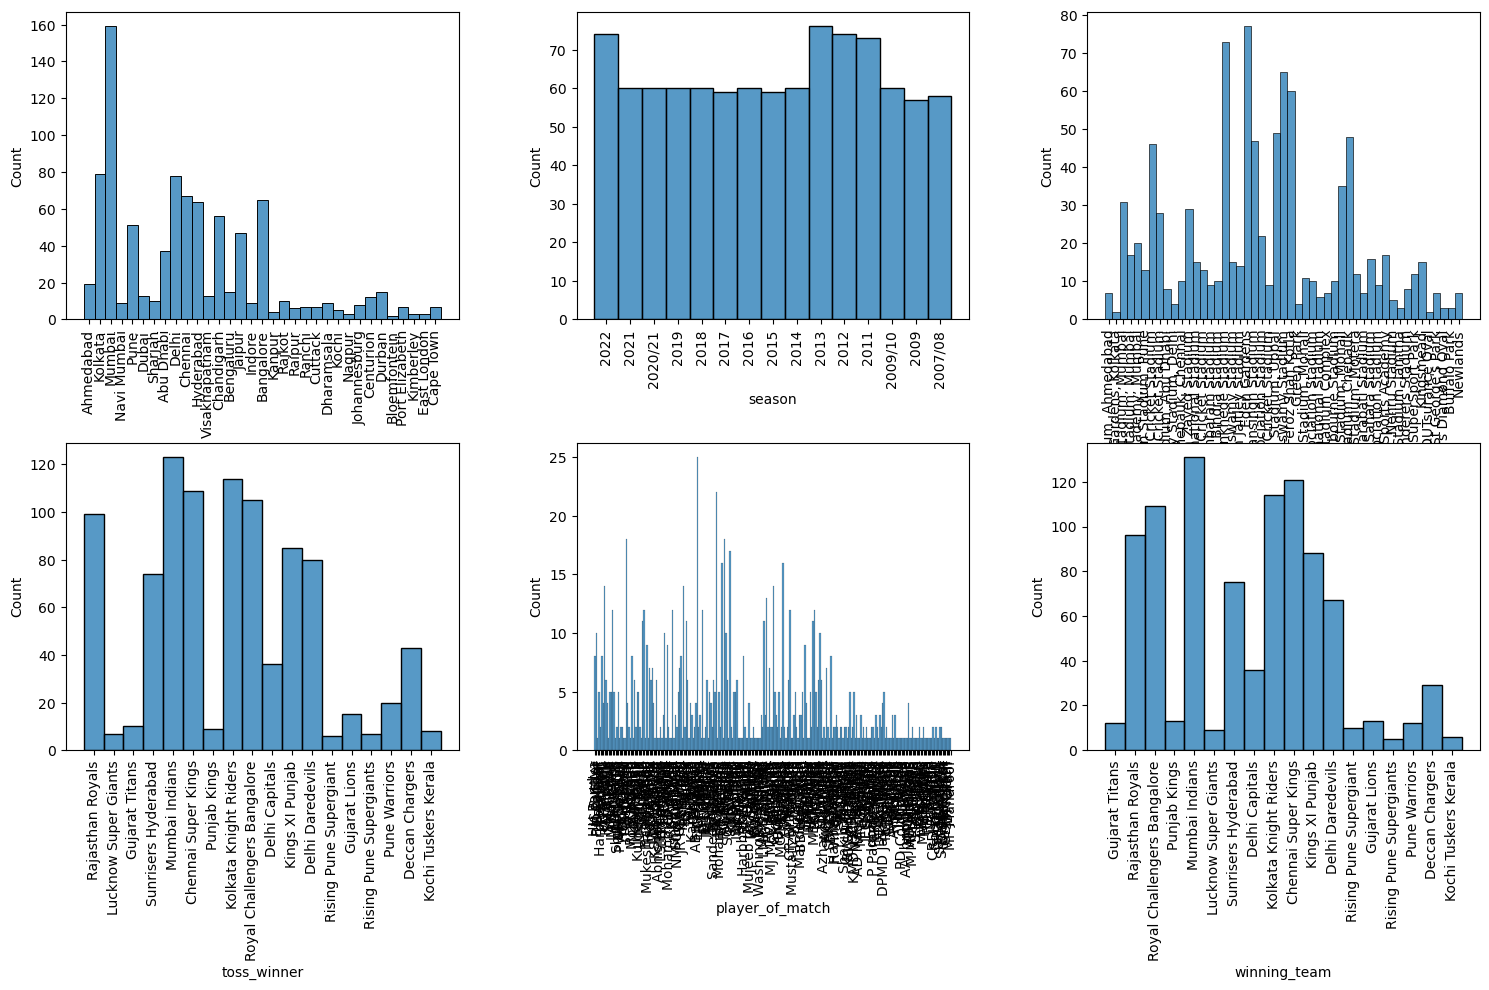

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots for the histograms
fig, axis = plt.subplots(2, 3, figsize=(15, 10))

# Create histograms for each column with label rotation
sns.histplot(ax=axis[0, 0], data=matches, x="city")
axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=90)

sns.histplot(ax=axis[0, 1], data=matches, x="season")
axis[0, 1].set_xticklabels(axis[0, 1].get_xticklabels(), rotation=90)

sns.histplot(ax=axis[0, 2], data=matches, x="venue")
axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=90)

sns.histplot(ax=axis[1, 0], data=matches, x="toss_winner")
axis[1, 0].set_xticklabels(axis[1, 0].get_xticklabels(), rotation=90)

sns.histplot(ax=axis[1, 1], data=matches, x="player_of_match")
axis[1, 1].set_xticklabels(axis[1, 1].get_xticklabels(), rotation=90)

sns.histplot(ax=axis[1, 2], data=matches, x="winning_team")
axis[1, 2].set_xticklabels(axis[1, 2].get_xticklabels(), rotation=90)

# Adjust layout to prevent overlap and ensure clarity
plt.tight_layout()

# Adjust spacing between plots if needed
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Show the plot
plt.show()


### Analysis  of Numeric variable

In [55]:

# Binarize the 'toss_decision' column and update it in the dataset
matches["toss_decision"] = (matches["toss_decision"] == "bat").astype(int)

# Check the result to confirm the changes
print(matches[["toss_decision"]].head())


# Check the result
matches.head()



   toss_decision
0              0
1              0
2              0
3              0
4              0


,id,city,season,team1,team2,venue,toss_winner,toss_decision,superover,winning_team,won_by,margin,player_of_match
0,1312200,Ahmedabad,2022,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,0,N,Gujarat Titans,Wickets,7.0,HH Pandya
1,1312199,Ahmedabad,2022,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,0,N,Rajasthan Royals,Wickets,7.0,JC Buttler
2,1312198,Kolkata,2022,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,0,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar
3,1312197,Kolkata,2022,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,0,N,Gujarat Titans,Wickets,7.0,DA Miller
4,1304116,Mumbai,2022,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,0,N,Punjab Kings,Wickets,5.0,Harpreet Brar


C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


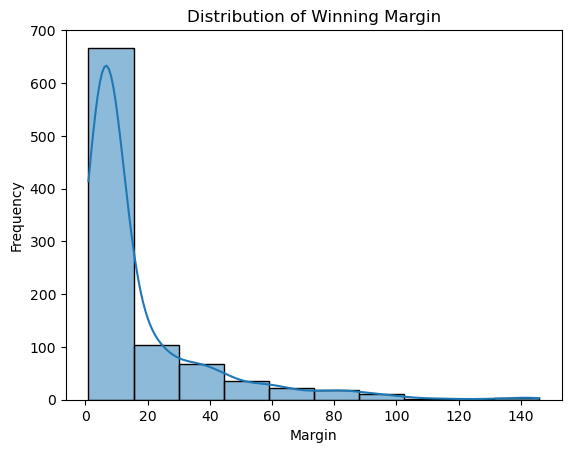

C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


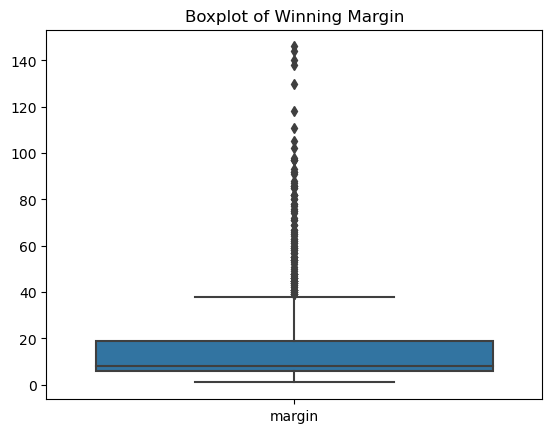

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'margin'
sns.histplot(matches['margin'], bins=10, kde=True)
plt.title("Distribution of Winning Margin")
plt.xlabel("Margin")
plt.ylabel("Frequency")
plt.show()

# Boxplot for numerical columns
sns.boxplot(data=matches[['margin']])
plt.title("Boxplot of Winning Margin")
plt.show()


#### Numric-numeric Analysis
Here we plot the graph betwwen a categorical variable and the numeric variable ,where the categorical variable is binarize to numeric variable.

C:\Users\rosha\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


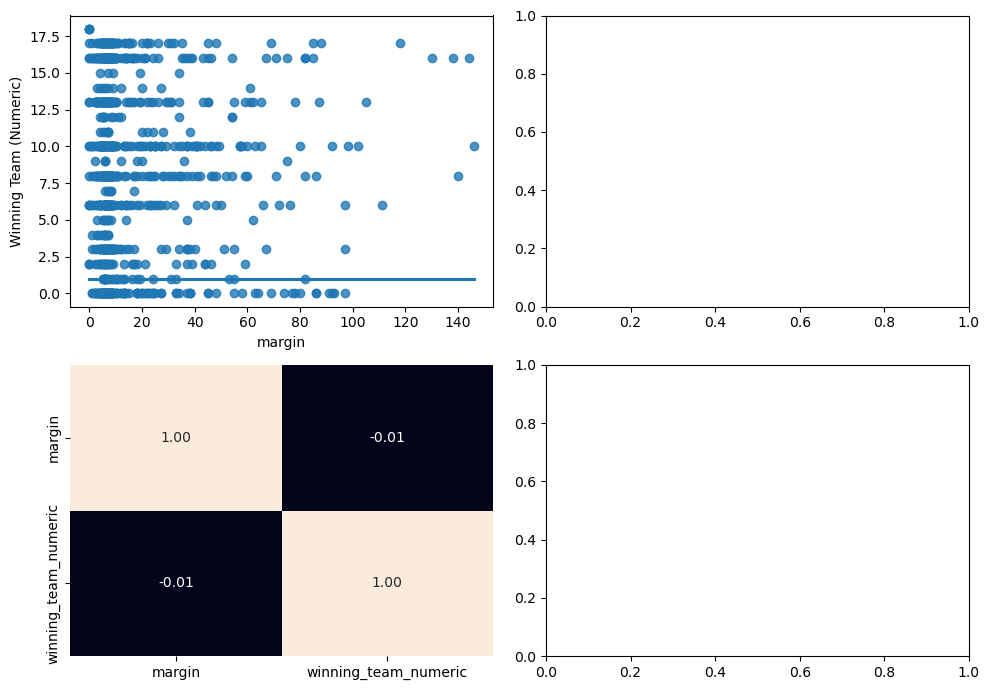

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'winning_team' to numeric (optional for visualization purposes)
matches['winning_team_numeric'] = matches['winning_team'].astype('category').cat.codes

# Create subplots
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Create a scatter plot of margin vs. winning team (binned to numeric 'winning_team_numeric')
sns.regplot(ax=axis[0, 0], data=matches, x="margin", y="winning_team_numeric", logistic=True)
axis[0, 0].set_ylabel('Winning Team (Numeric)')

# Create a heatmap of the correlation matrix for numeric columns
sns.heatmap(matches[["margin", "winning_team_numeric"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


## Categorical Variable Analysis

C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


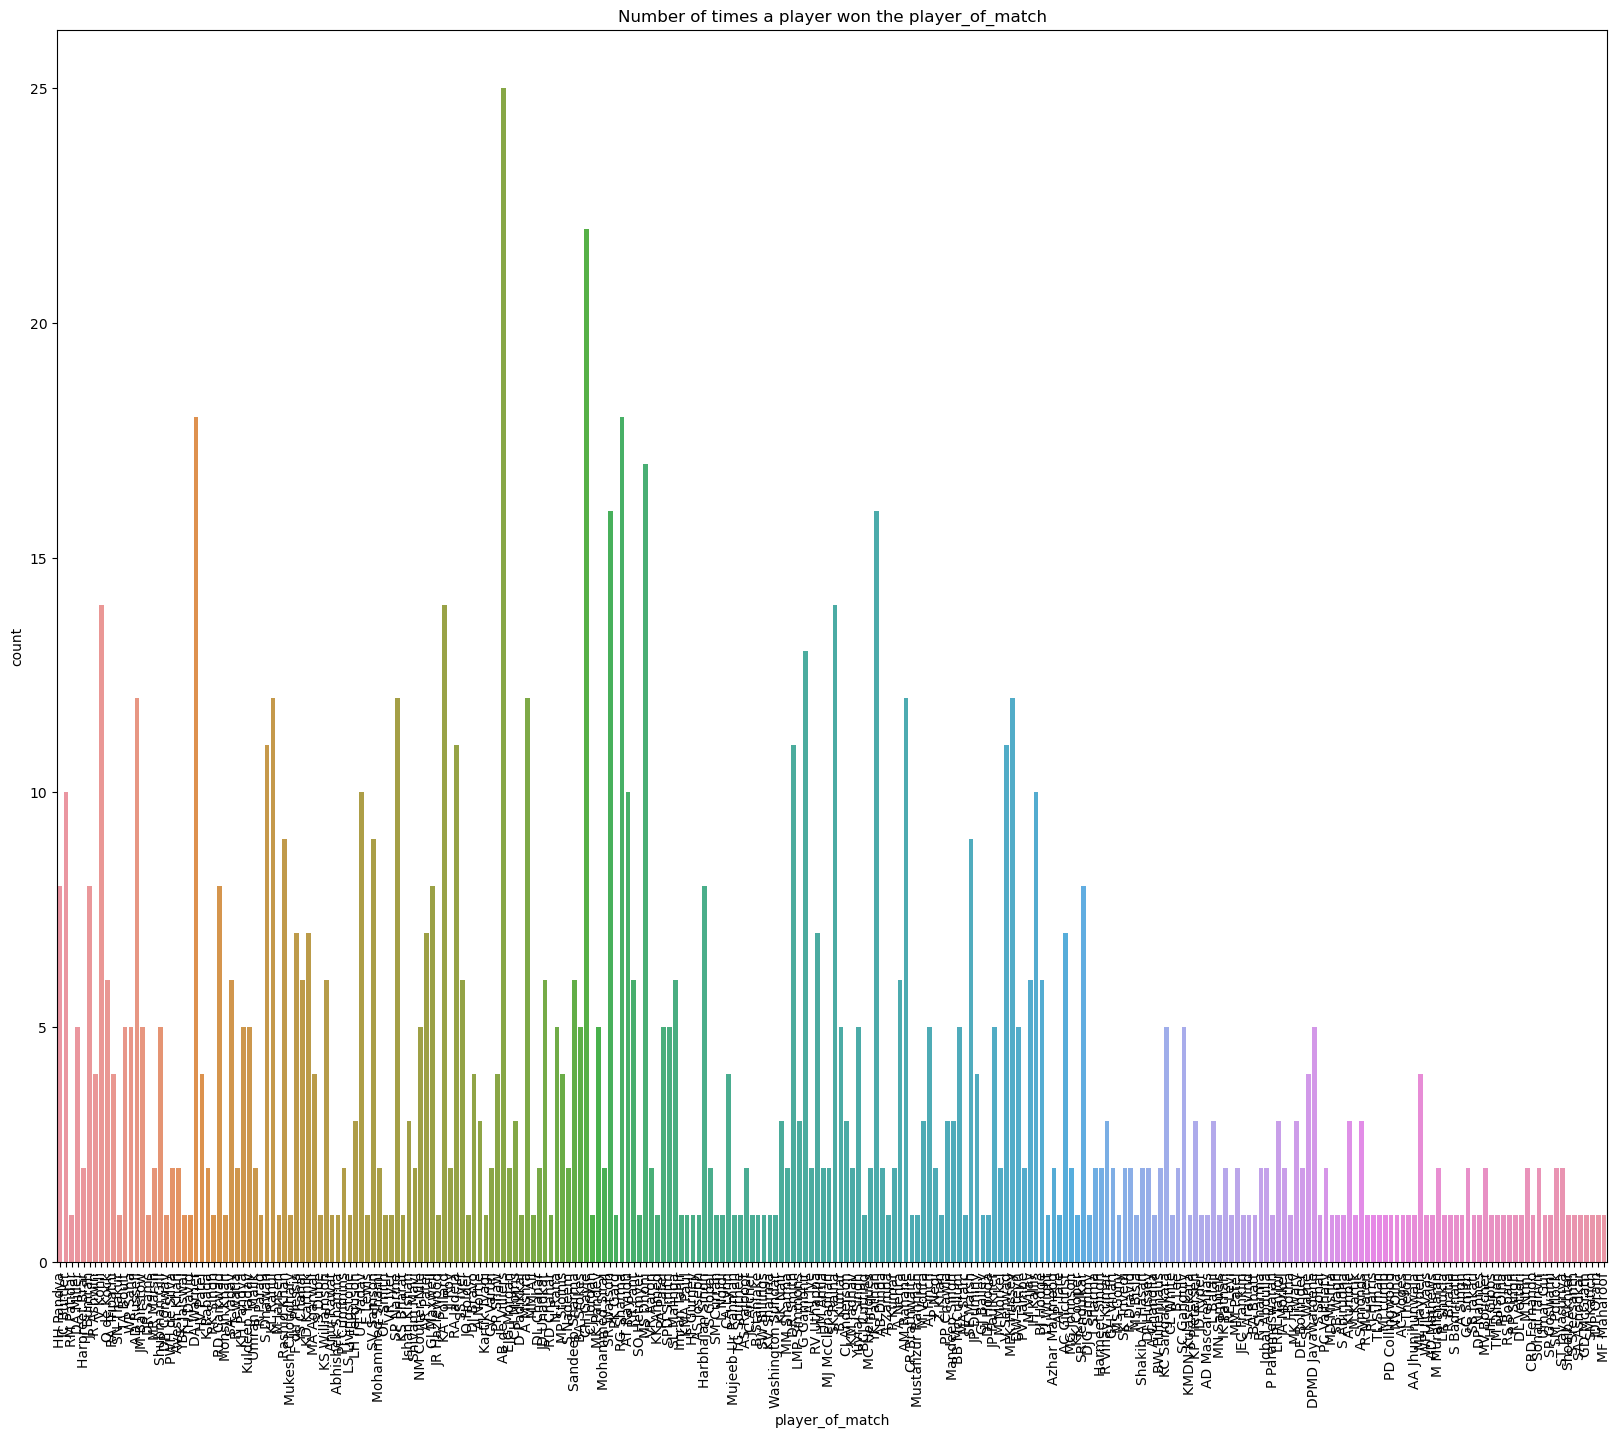

In [167]:
# Count plot for 'player_of_match'

plt.figure(figsize=(20, 16))  # Optionally, increase the figure size
sns.countplot(x=matches['player_of_match'])

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

plt.title("Number of times a player won the player_of_match")
plt.show()



C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


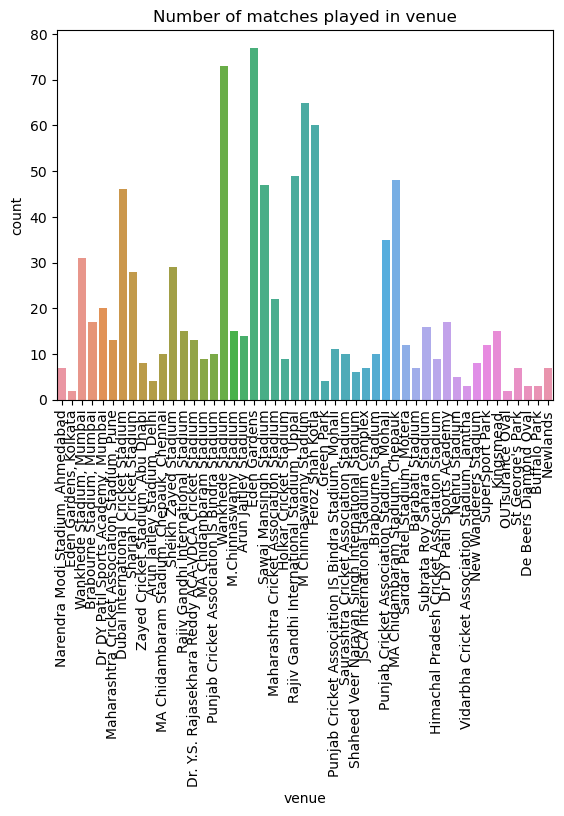

In [168]:
# Count plot for 'Venue'
sns.countplot(x=matches['venue'])
plt.xticks(rotation=90)
plt.title("Number of matches played in venue")
plt.show()



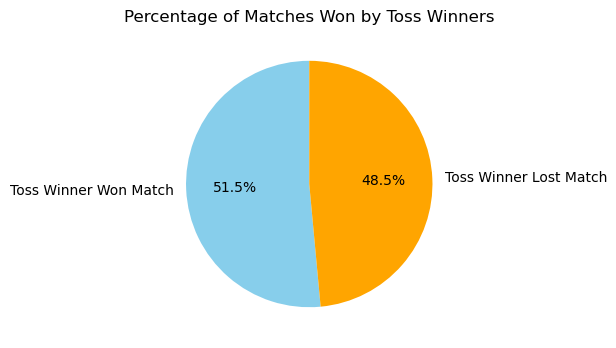

In [97]:

# Calculate the number of matches where toss winner also won the match
toss_win_match_win = matches[matches["toss_winner"] == matches["winning_team"]].shape[0]
toss_win_match_loss = matches.shape[0] - toss_win_match_win

# Data for visualization
labels = ["Toss Winner Won Match", "Toss Winner Lost Match"]
values = [toss_win_match_win, toss_win_match_loss]

# Pie Chart
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=90, colors=["skyblue", "orange"])
plt.title("Percentage of Matches Won by Toss Winners")
plt.show()


batter
PN Mankad        400.000000
B Stanlake       250.000000
Umar Gul         205.263158
RS Sodhi         200.000000
TH David         198.936170
Shahid Afridi    176.086957
TU Deshpande     175.000000
I Malhotra       175.000000
LJ Wright        168.253968
AD Russell       168.234323
dtype: float64


C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


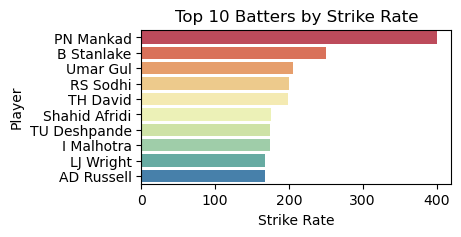

In [103]:
# Calculate strike rate
balls_faced = balls.groupby("batter").size()
strike_rate = (player_runs / balls_faced) * 100
top_strike_rate = strike_rate.sort_values(ascending=False).head(10)
print(top_strike_rate)

# Visualization
plt.figure(figsize=(4, 2))
sns.barplot(y=top_strike_rate.index, x=top_strike_rate.values, palette="Spectral")
plt.title("Top 10 Batters by Strike Rate")
plt.xlabel("Strike Rate")
plt.ylabel("Player")
plt.show()


bowler
NB Singh         4.500000
DJ Thornely      5.853659
LA Carseldine    6.000000
AM Rahane        6.000000
DA Warner        6.000000
M Manhas         6.000000
SS Mundhe        6.000000
Mohsin Khan      6.312500
Tilak Varma      6.500000
A Chandila       6.591928
dtype: float64


C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


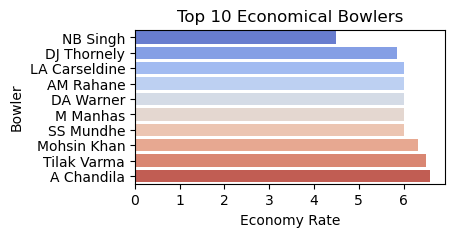

In [104]:
# Calculate economy rate
balls_per_bowler = balls[balls["iswicket_delivery"] == 0].groupby("bowler").size()
runs_per_bowler = balls.groupby("bowler")["total_run"].sum()
economy_rate = (runs_per_bowler / balls_per_bowler) * 6  # per over

top_bowlers_economy = economy_rate.sort_values().head(10)
print(top_bowlers_economy)

# Visualization
plt.figure(figsize=(4, 2))
sns.barplot(y=top_bowlers_economy.index, x=top_bowlers_economy.values, palette="coolwarm")
plt.title("Top 10 Economical Bowlers")
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.show()


winning_team
Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Kings XI Punjab                 88
Sunrisers Hyderabad             75
Delhi Daredevils                67
Delhi Capitals                  36
Deccan Chargers                 29
Gujarat Lions                   13
Punjab Kings                    13
Pune Warriors                   12
Gujarat Titans                  12
Rising Pune Supergiant          10
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


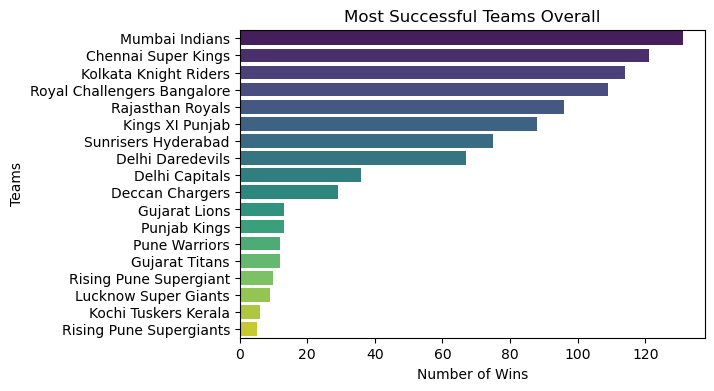

In [105]:
team_wins = matches["winning_team"].value_counts()
print(team_wins)

# Bar plot for wins
plt.figure(figsize=(6, 4))
sns.barplot(y=team_wins.index, x=team_wins.values, palette="viridis")
plt.title("Most Successful Teams Overall")
plt.xlabel("Number of Wins")
plt.ylabel("Teams")
plt.show()


##### Orange and Purple Cap holders

batter
V Kohli      6634
S Dhawan     6244
DA Warner    5883
RG Sharma    5881
SK Raina     5536
Name: batsman_run, dtype: int64
bowler
DJ Bravo      207
SL Malinga    188
A Mishra      175
R Ashwin      174
YS Chahal     172
Name: count, dtype: int64


C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


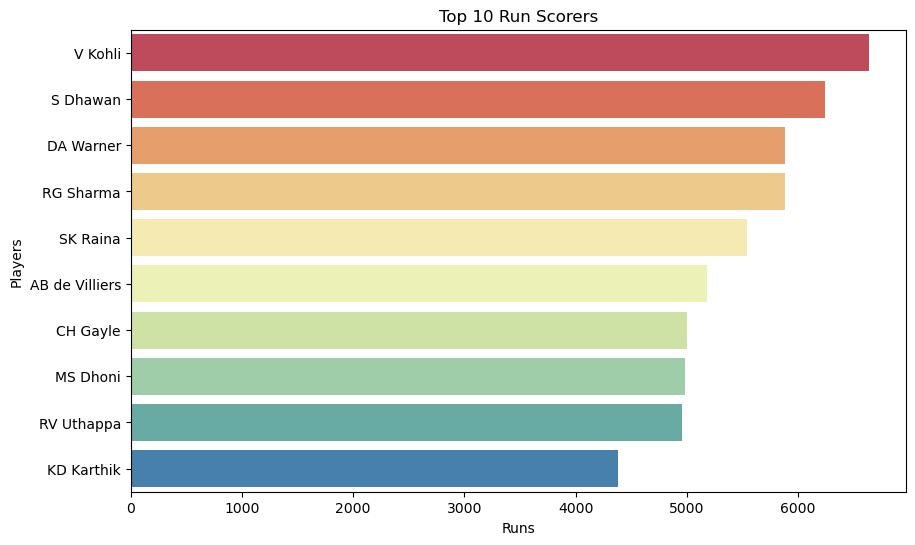

C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


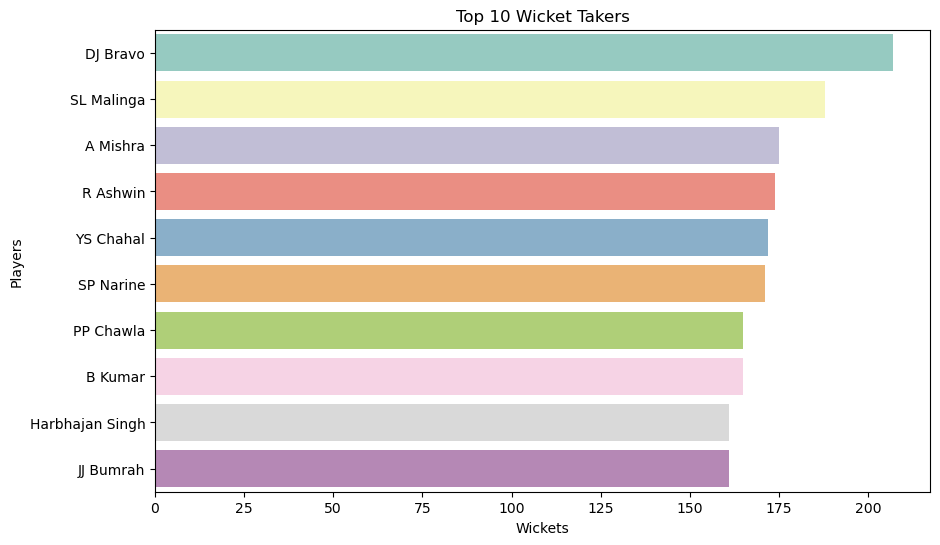

In [92]:
# Analyze Orange Cap holders (most runs)
player_runs = balls.groupby("batter")["batsman_run"].sum().sort_values(ascending=False)
print(player_runs.head())

# Analyze Purple Cap holders (most wickets)
player_wickets = balls[balls["iswicket_delivery"] == 1]["bowler"].value_counts()
print(player_wickets.head())

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(y=player_runs.head(10).index, x=player_runs.head(10).values, palette="Spectral")
plt.title("Top 10 Run Scorers")
plt.xlabel("Runs")
plt.ylabel("Players")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(y=player_wickets.head(10).index, x=player_wickets.head(10).values, palette="Set3")
plt.title("Top 10 Wicket Takers")
plt.xlabel("Wickets")
plt.ylabel("Players")
plt.show()


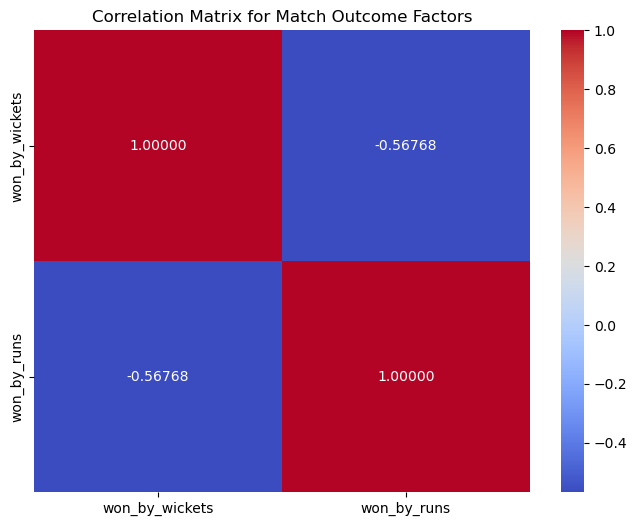

In [111]:
# Preprocess the 'won_by' column
matches['won_by_wickets'] = matches.apply(lambda x: x['margin'] if x['won_by'] == 'Wickets' else 0, axis=1)
matches['won_by_runs'] = matches.apply(lambda x: x['margin'] if x['won_by'] == 'Runs' else 0, axis=1)

# Select only numerical columns
numeric_columns = matches[[ 'won_by_wickets', 'won_by_runs']]

# Compute correlation
correlation = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".5f")
plt.title("Correlation Matrix for Match Outcome Factors")
plt.show()


In [113]:
# Save processed and summarized insights for future predictions
player_wickets.to_csv("C:/Users/rosha/Documents/M.Tech/Mahindra University/SEMESTER_1/Essentials_Of-DS-CS5113/Project/top_bowlers_economy.csv")
player_runs.to_csv("C:/Users/rosha/Documents/M.Tech/Mahindra University/SEMESTER_1/Essentials_Of-DS-CS5113/Project/top_batters_runs.csv")



### Preparing Data for predictive Analysis 
#### `Feature Selection`
#### `Feature Engineering`


In [118]:
# Re-encode categorical variables after handling missing values
le_team = LabelEncoder()
matches["team1_encoded"] = le_team.fit_transform(matches["team1"])
matches["team2_encoded"] = le_team.transform(matches["team2"])
matches["toss_winner_encoded"] = le_team.transform(matches["toss_winner"])
matches["winner_encoded"] = le_team.transform(matches["winning_team"])

# Feature selection
features = matches[["team1_encoded", "team2_encoded", "toss_winner_encoded", "toss_decision"]]
features["toss_decision"] = features["toss_decision"].map({"bat": 0, "field": 1})
target = matches["winner_encoded"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Handle missing or inconsistent values in features
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Ensure target has no NaN values
y_train = y_train.fillna(-1)  # Replace NaNs with placeholder value
y_test = y_test.fillna(-1)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\rosha\AppData\Local\Temp\ipykernel_21904\3546541094.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["toss_decision"] = features["toss_decision"].map({"bat": 0, "field": 1})


Accuracy: 0.176056338028169
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.60      0.27        30
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00        27
           7       0.00      0.00      0.00         1
           8       0.05      0.03      0.04        35
           9       0.00      0.00      0.00         3
          10       0.21      0.38      0.27        42
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00        33
          14       0.00      0.00      0.00         6
          16       0.21      0.42      0.28        31
          17       0.25      

C:\Users\rosha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

               Feature  Coefficient
3        toss_decision     0.000000
2  toss_winner_encoded    -0.039084
0        team1_encoded    -0.234311
1        team2_encoded    -0.239924


C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


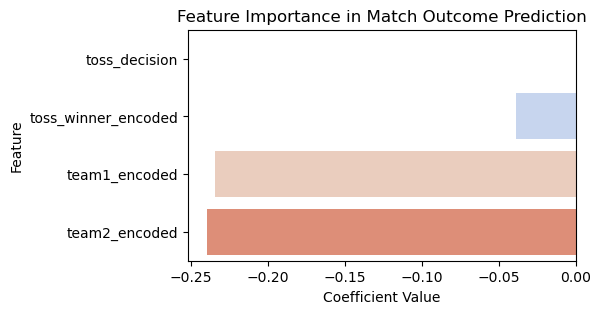

In [120]:
# Analyze coefficients to understand feature importance
coefficients = pd.DataFrame({
    "Feature": features.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)

# Plot feature importance
plt.figure(figsize=(5, 3))
sns.barplot(y=coefficients["Feature"], x=coefficients["Coefficient"], palette="coolwarm")
plt.title("Feature Importance in Match Outcome Prediction")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


In [124]:
# Add new features
matches["is_home_team"] = (matches["city"] == matches["venue"]).astype(int)
matches["bat_first"] = (matches["margin"] > 0).astype(int)

# Encode target
matches["toss_win_match_win"] = (matches["toss_winner"] == matches["winning_team"]).astype(int)

# Selecting features
features = matches[[
    "team1_encoded", "team2_encoded", "toss_winner_encoded", "toss_decision",
    "is_home_team", "bat_first", "margin", "won_by"
]]
features["toss_decision"] = features["toss_decision"].map({"bat": 0, "field": 1})

target = matches["toss_win_match_win"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


C:\Users\rosha\AppData\Local\Temp\ipykernel_21904\1778253919.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["toss_decision"] = features["toss_decision"].map({"bat": 0, "field": 1})


In [128]:
print(matches.isnull().sum())
print(matches["toss_decision"].unique())
print(matches["won_by"].unique())


id                       0
city                    51
season                   0
team1                    0
team2                    0
venue                    0
toss_winner              0
toss_decision            0
superover                0
winning_team             0
won_by                   0
margin                  14
player_of_match          0
winning_team_numeric     0
toss_win_match_win       0
won_by_wickets           0
won_by_runs              0
team1_encoded            0
team2_encoded            0
toss_winner_encoded      0
winner_encoded           0
is_home_team             0
bat_first                0
won_by_numeric          14
dtype: int64
[0]
['Wickets' 'Runs' 'SuperOver']


In [132]:
# Ensure won_by includes SuperOver
print("Unique values in won_by before mapping:", matches["won_by"].unique())
matches["won_by_numeric"] = matches["won_by"].map({"Runs": 0, "Wickets": 1, "SuperOver": 2})
print("Unique values after mapping won_by:", matches["won_by_numeric"].unique())

# Drop rows where mappings failed
matches = matches.dropna(subset=["toss_decision_numeric", "won_by_numeric"])

# Prepare the feature matrix
features = matches[["team1_encoded", "team2_encoded", "toss_winner_encoded", "toss_decision_numeric", "won_by_numeric"]]

# Target variable
target = matches["winner_encoded"]

# Combine features and target, then drop rows with missing values
valid_data = features.join(target).dropna()

# Check the size of the valid dataset
print(f"Valid dataset size after preprocessing: {valid_data.shape}")

# Ensure there is enough data
if len(valid_data) < 2:
    raise ValueError("Not enough data to split into train and test sets. Check your preprocessing steps.")

# Separate features and target
X = valid_data.drop("winner_encoded", axis=1)
y = valid_data["winner_encoded"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Unique values in won_by before mapping: ['Wickets' 'Runs']
Unique values after mapping won_by: [1 0]
Valid dataset size after preprocessing: (932, 6)
Training set size: 652
Testing set size: 280


### Summary Statistics

In [134]:

print("Summary of Statistics:")
print(valid_data.describe())

# Check for class imbalance in the target
print("\nClass Distribution in 'winner_encoded':")
print(valid_data["winner_encoded"].value_counts())


Summary of Statistics:
       team1_encoded  team2_encoded  toss_winner_encoded  \
count     932.000000     932.000000           932.000000   
mean        8.507511       8.625536             8.383047   
std         5.624382       5.496245             5.575982   
min         0.000000       0.000000             0.000000   
25%         3.000000       3.000000             3.000000   
50%         8.000000       8.000000             8.000000   
75%        13.000000      13.000000            13.000000   
max        17.000000      17.000000            17.000000   

       toss_decision_numeric  won_by_numeric  winner_encoded  
count                  932.0      932.000000      932.000000  
mean                     0.0        0.546137        8.508584  
std                      0.0        0.498134        5.589515  
min                      0.0        0.000000        0.000000  
25%                      0.0        0.000000        3.000000  
50%                      0.0        1.000000        8.0000

### Feature Distribution 

C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


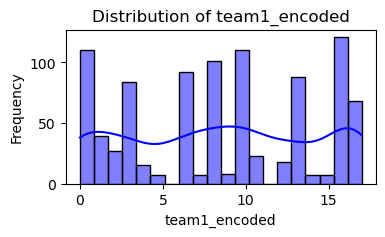

C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


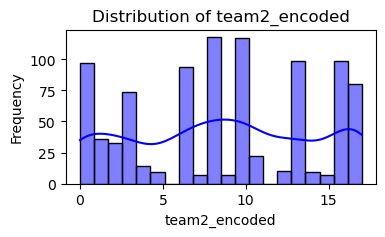

C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


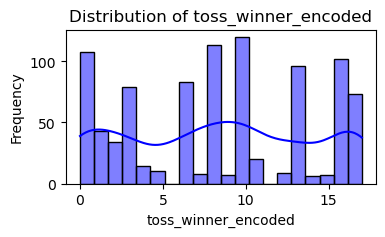

C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


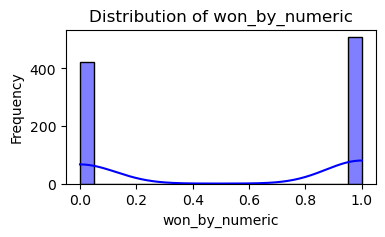

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of features
features_list = ["team1_encoded", "team2_encoded", "toss_winner_encoded", "won_by_numeric"]
for feature in features_list:
    plt.figure(figsize=(4, 2))
    sns.histplot(valid_data[feature], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


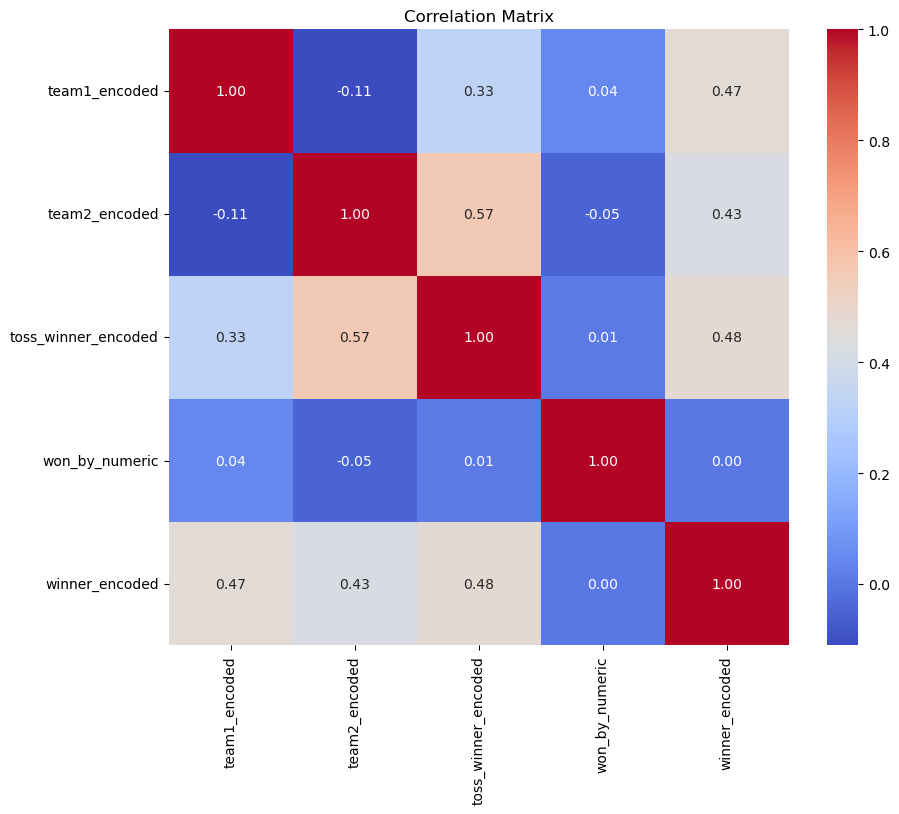

In [142]:
# Correlation matrix
plt.figure(figsize=(10, 8))


correlation = valid_data.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

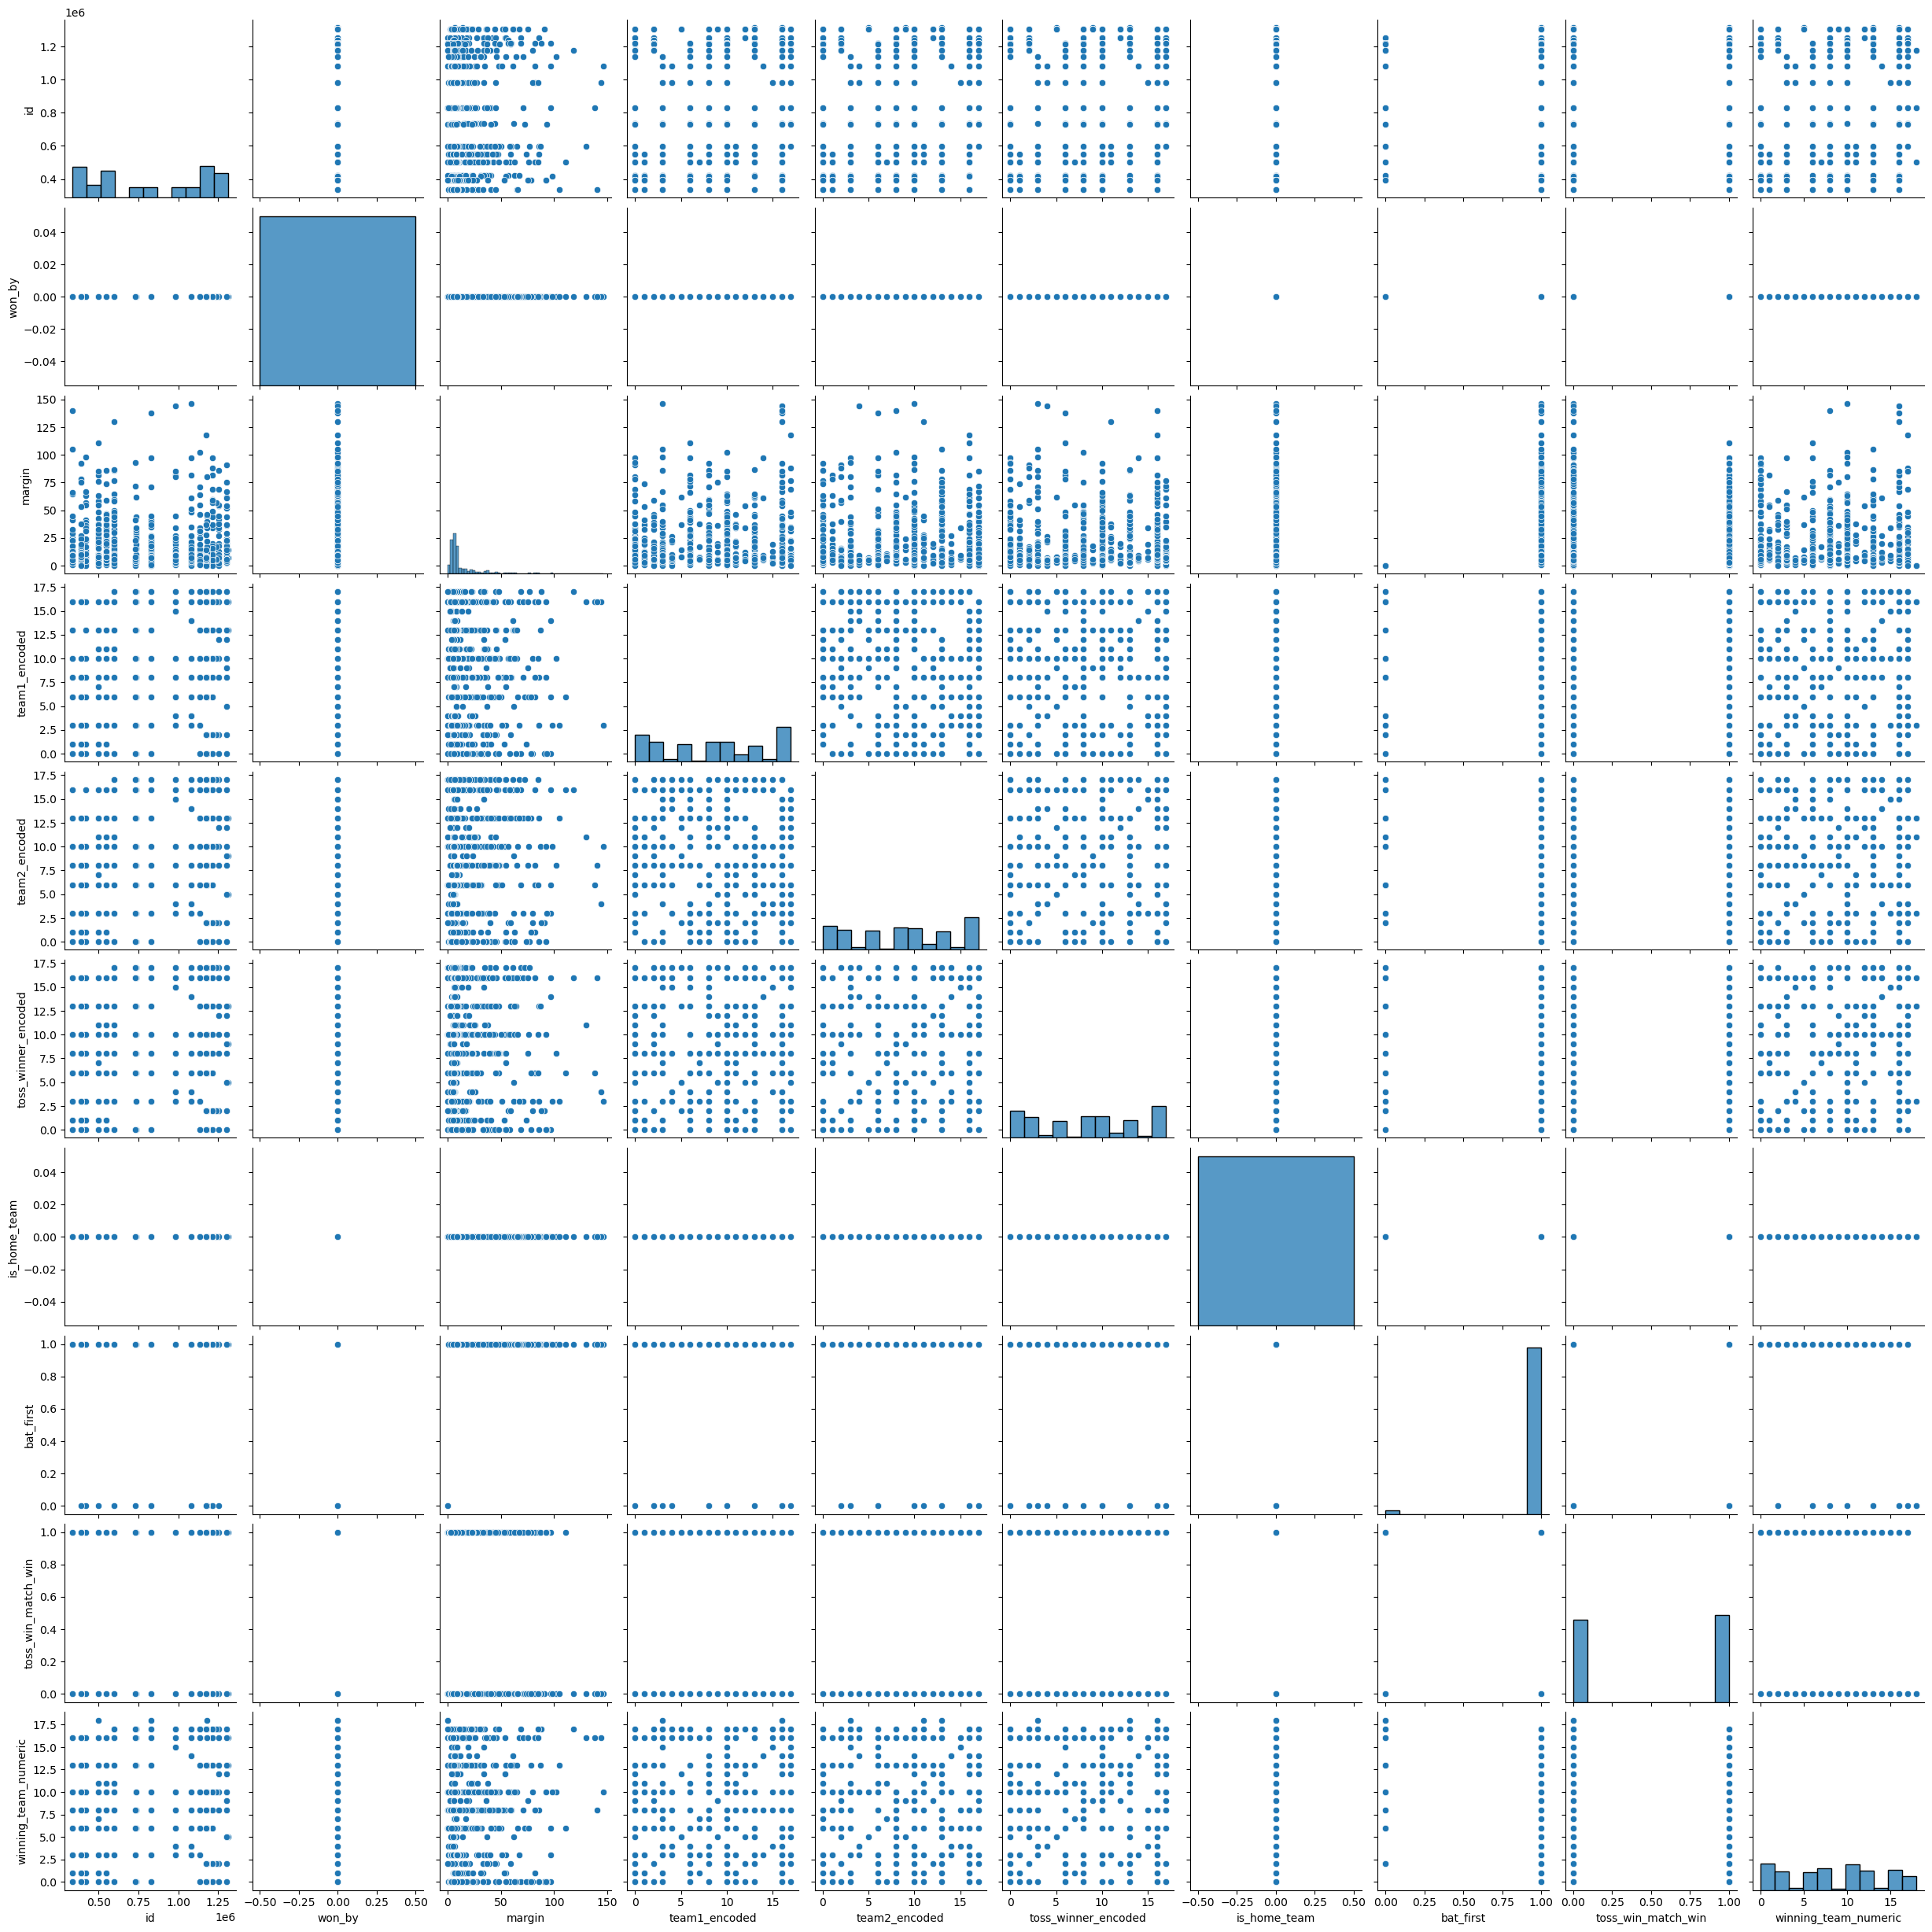

In [171]:
sns.pairplot(data=matches)

In [6]:
balls.describe()

,id,innings,overs,ball_number,batsman_run,extras_run,total_run,non_boundary,iswicket_delivery
count,2.259540e+05,225954.000000,225954.000000,225954.000000,225954.000000,225954.000000,225954.00000,225954.000000,225954.000000
mean,8.320470e+05,1.483868,9.185679,3.619750,1.243523,0.066907,1.31043,0.000093,0.049351
std,3.379542e+05,0.503104,5.681797,1.810633,1.618166,0.341470,1.60605,0.009640,0.216600
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.012620e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,8.297370e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.00000,0.000000,0.000000
75%,1.178395e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.00000,0.000000,0.000000
max,1.312200e+06,6.000000,19.000000,10.000000,6.000000,7.000000,7.00000,1.000000,1.000000


In [7]:
matches.describe()

,id,margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000
